# **DIABETES CLASSIFICATION MODEL**

Using patient health metrics to predict diabetes, enabling early detection and improving preventive care.

## Data Collection and Loading

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd

In [2]:
#loading the dataset
df = pd.read_csv("../datasets/diabetes.csv")

### Preview of data

In [3]:
#displaying the first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#extracting the shape of the dataset
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Exploratory Data Analysis

In [6]:
#importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Overview and Statistics

In [7]:
#extracting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#finding missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#finding duplicated rows in the dataset
print(f"Duplicated rows: {df.duplicated().sum()}")

Duplicated rows: 0


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 -> negative case\
1 -> positive case

In [12]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Data Visualization

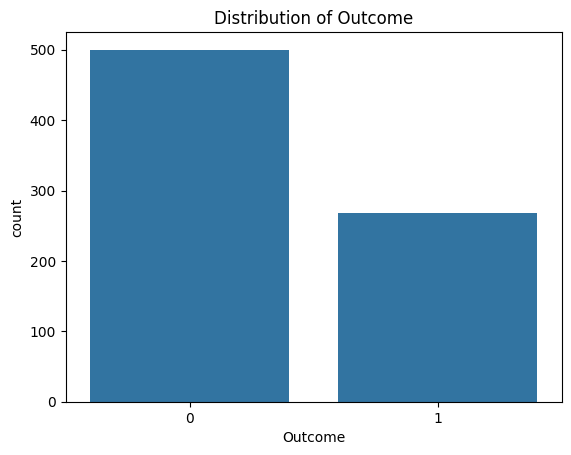

In [13]:
# Plot distribution of target variable
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome')
plt.show()


The dataset is **imbalanced**, with significantly more non-diabetic cases than diabetic cases.

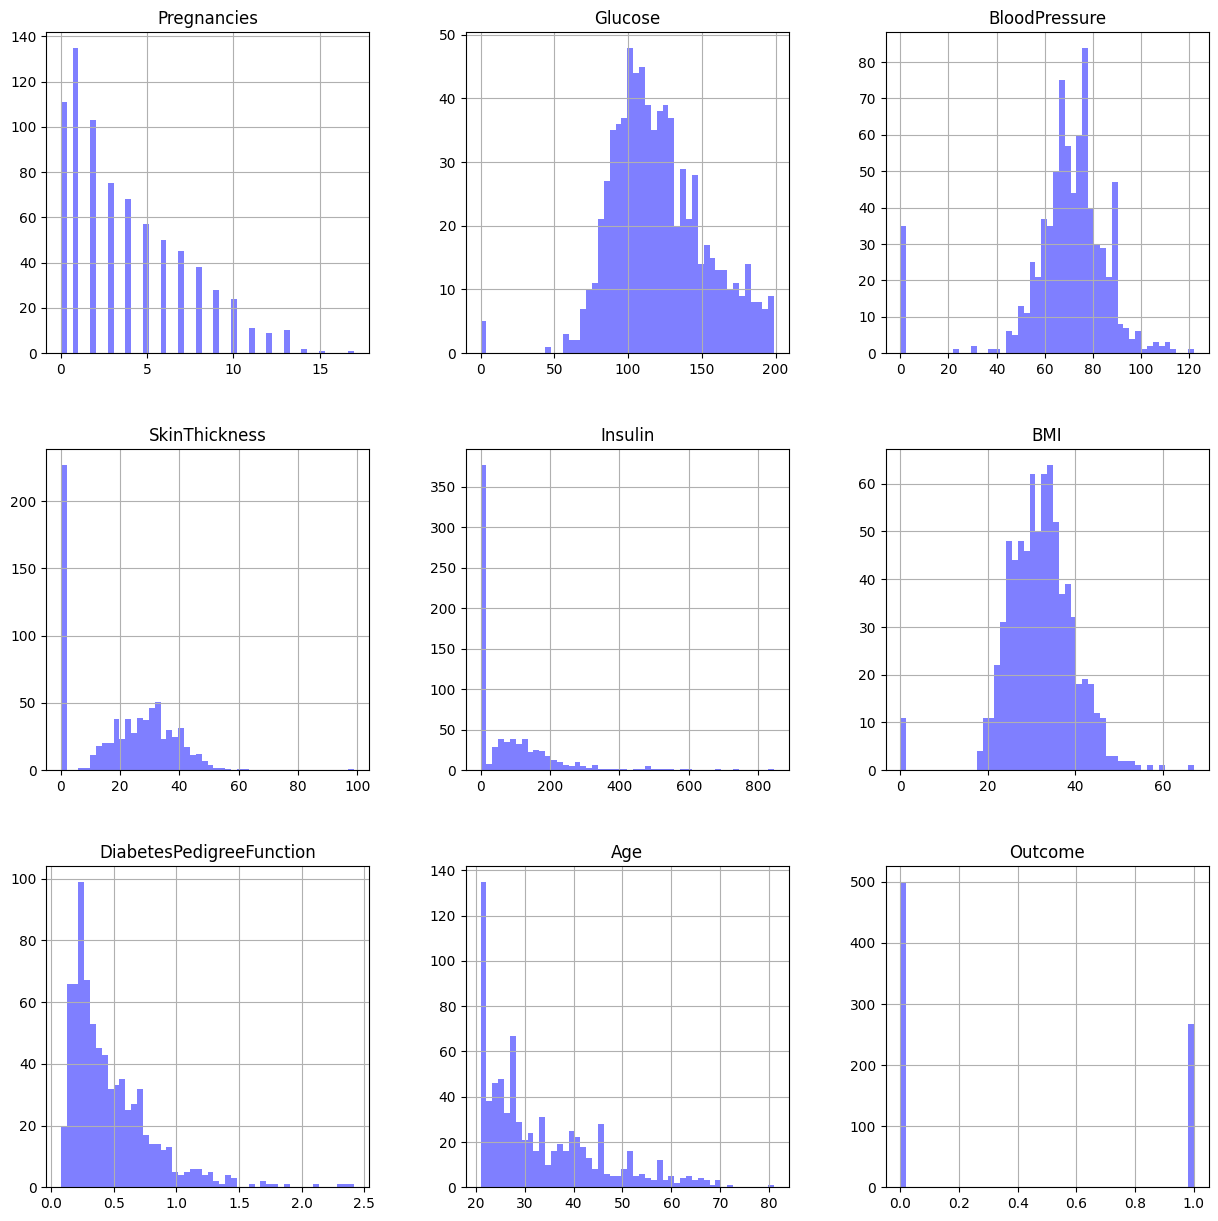

In [14]:
df.hist(bins = 50, figsize = (15, 15), color = 'b', grid=True, alpha=0.5)
plt.show()

- **`Pregnancies`, `Age`, `DiabetesPedigreeFunction`:** Right-skewed distributions.
- **`BloodPressure`, `SkinThickness`, `Insulin`, `Glucose`, `BMI`:** Seems to show zero values, indicating possible missing data.  
- **`Outcome`:** Imbalanced classes, with fewer diabetic cases.

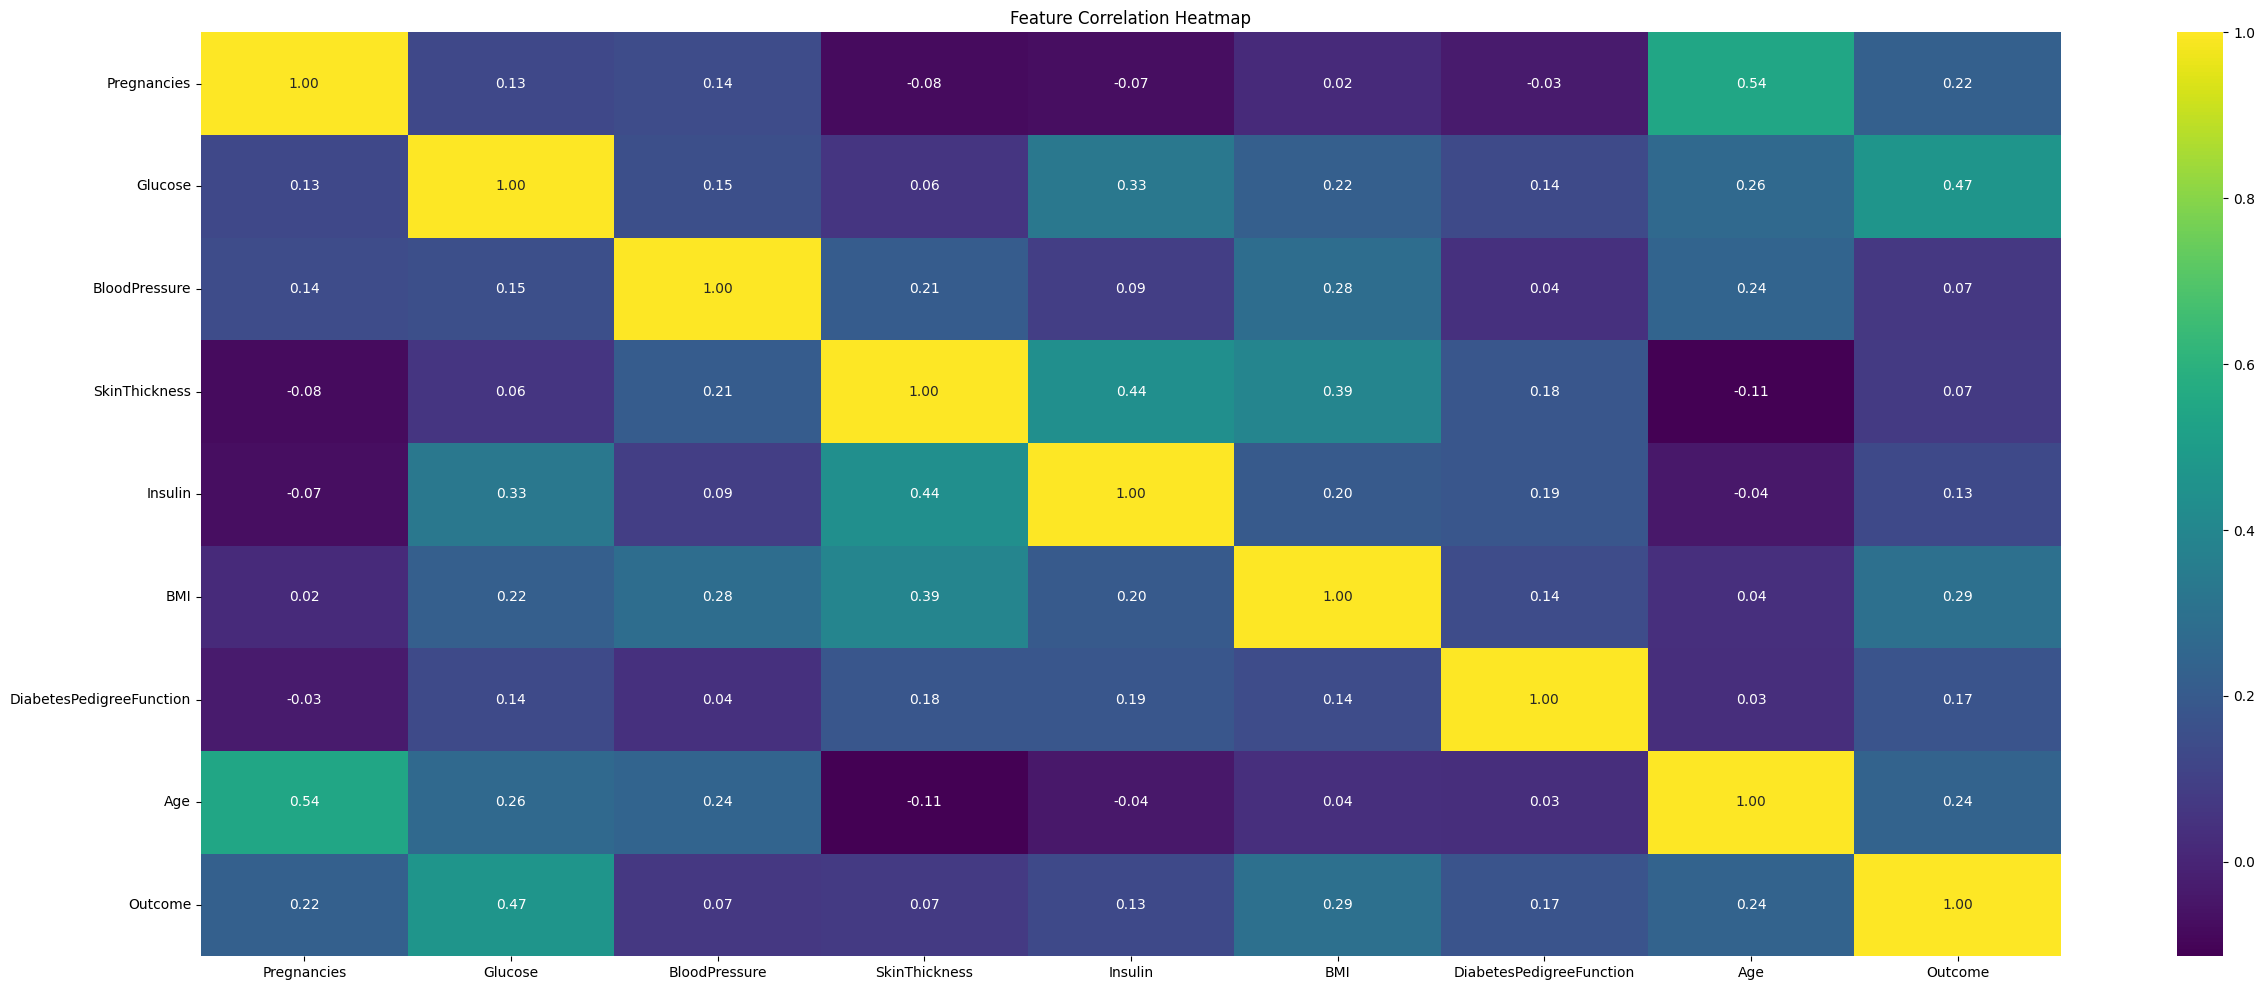

In [15]:
plt.figure(figsize=(30, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

- `Glucose`, `BMI`, and `Age` show strong correlation with diabetes risk.  
- `Age` and `Pregnancies` have moderate correlation, indicating age-related risk factors.  
- Weak correlation between most other features suggests limited linear relationships.  

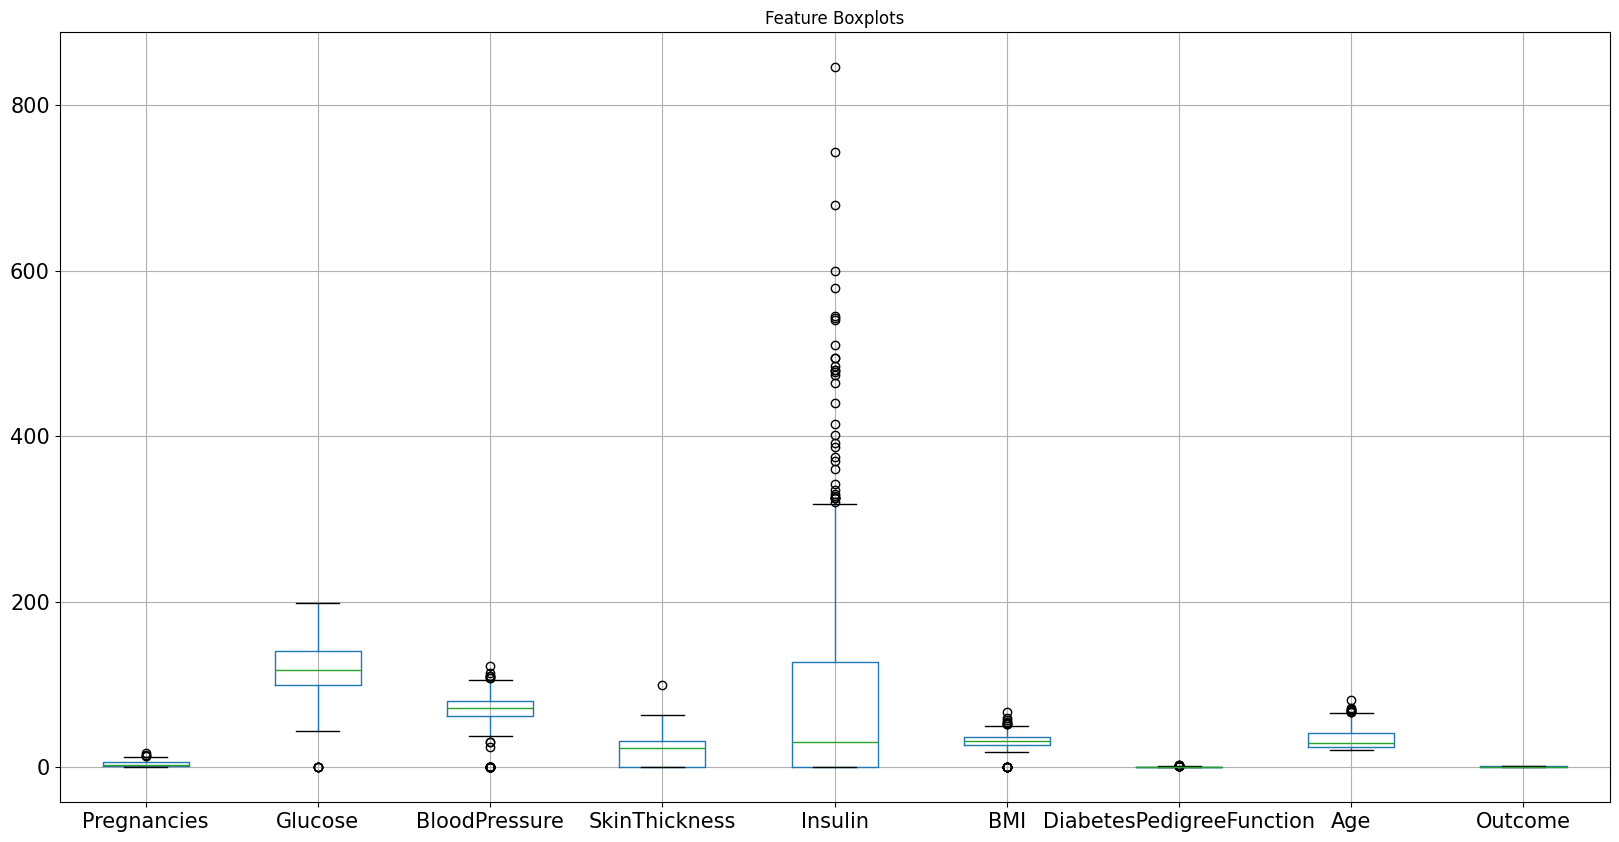

In [16]:
#Boxplotss for all numerical features
df.boxplot(grid=True, fontsize=15, figsize=(20,10))
plt.title("Feature Boxplots")
plt.show()

- Severe outliers in `Insulin`, `SkinThickness`, and `BloodPressure`.  
- `BMI` and `Pregnancies` also show minor outliers.  
- Outliers may indicate measurement errors or missing values.  

## Data Cleaning and Preprocessing

In [17]:
#importing necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [18]:
missing_values_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in missing_values_col:
    print(col ,":", (df[col] == 0).sum())

Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11


In [19]:
for col in missing_values_col:
    df[col] = df[col].replace(0, np.nan)

In [20]:
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [21]:
for col in missing_values_col:
   df[col].fillna(df[col].median(), inplace=True)

C:\Users\eshit\AppData\Local\Temp\ipykernel_14556\266011776.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\eshit\AppData\Local\Temp\ipykernel_14556\266011776.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [22]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [23]:
#Handling outliers using IQR method

for col in ['Insulin', 'SkinThickness', 'BloodPressure', 'Pregnancies', 'BMI']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    #defining acceptable range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Capping the values
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound

C:\Users\eshit\AppData\Local\Temp\ipykernel_14556\3732898733.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = lower_bound


In [24]:
#Class balancing

X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [25]:
#SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [26]:
print("Original dataset shape: ", X.shape, y.shape)
print("Resampled dataset shape: ", X_res.shape, y_res.shape)

Original dataset shape:  (768, 8) (768,)
Resampled dataset shape:  (1000, 8) (1000,)


In [27]:
print("Initial Outcome: ",y.value_counts())
print("Revised Outcome: ",y_res.value_counts())

Initial Outcome:  Outcome
0    500
1    268
Name: count, dtype: int64
Revised Outcome:  Outcome
1    500
0    500
Name: count, dtype: int64


In [28]:
#Feature Scaling
scaler = StandardScaler()

In [29]:
X_scaled = scaler.fit_transform(X_res)

## Data Splitting

In [30]:
#imporing necessary libraries
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y_res, 
    test_size=0.2, 
    random_state=42,
    stratify=y_res
    )

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 8), (200, 8), (800,), (200,))

## Model Building

In [33]:
#importing necessary libraries
from sklearn.svm import SVC

In [34]:
model = SVC(kernel='rbf', C=1.0, random_state=42, class_weight='balanced')

In [35]:
model.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [36]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

## Model Evaluation

In [37]:
#import necessary libraries

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
print(accuracy_score(y_train, Y_train_pred))

0.84625


In [39]:
print(accuracy_score(y_test, Y_test_pred))

0.805


In [40]:
print(classification_report(y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       100
           1       0.79      0.83      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



<Axes: >

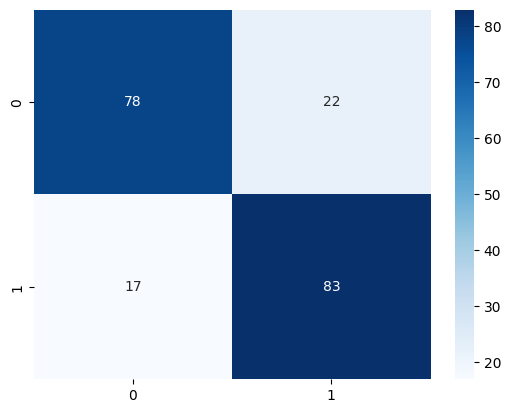

In [41]:
cm = confusion_matrix(y_test, Y_test_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues')

## Model Saving

In [42]:
#importing necessary libraries
import pickle

In [43]:
filename = "diabetes_model.sav"

In [44]:
#Save trained model
pickle.dump(model, open(filename, 'wb'))

In [45]:
#Save the Scaler
scaler_filename = "diabetes_model_scaler.pkl"

In [46]:
pickle.dump(scaler, open(scaler_filename, 'wb'))